# Assignment 2

This assignment is due on __Wednesday March 20, by 11:59PM	__. It pertains to content taught in classes 4-5.

This assignment should be completed in Python, and an PDF file should be submitted, containing both code and written answers. If you like, you may create your own Jupyter Notebook file from scratch, but it is likely easier to modify this one.

As before, questions that require identification and/or interpretation will not penalized for brevity of response: if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

If you like, you may collaborate with others in the class. If you choose to do so, please indicate with whom you have worked at the top of your PDF. Separate submissions are required.

Any questions can be addressed to Kamilah ([kamilah.ebrahim@mail.utoronto.ca]()) and/or Ananya ([ananya.jha@mail.utoronto.ca]()) and/or Vishnou ([vishnouvina@cs.toronto.edu]()) before the due-date. Please submit your assignments through your Drive Folder.
### Set up

In [21]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Import specific objects
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as skm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

%pip install l0bnb
from l0bnb import fit_path
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Install, import, and load specific package
%pip install faraway > nul 2>&1 # "> nul 2>&1" means that the install messages have been surpressed
import faraway as fw
import faraway.datasets.fat


Note: you may need to restart the kernel to use updated packages.


### Question 1: Regularization via best subset selection

First, we'll use the `swiss` dataset, which is a built-in dataset in R, but can be added to Python. As always, start by reviewing a description of the dataset, by typing `df` in the console.

In [22]:
# Import
swiss = sm.datasets.get_rdataset("swiss")
df = pd.DataFrame(swiss.data)

# Explore the dataset
df

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
rownames,,,,,,
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0


In [23]:
df.shape[0] # number of rows

47

Answer the following questions:

_(i)_ What will be the size (number of observations) of each LOOCV training sample?

**46**

_(ii)_ What will be the size (number of observations) of each LOOCV testing sample?

**1**

_(iii)_ How many "folds" (i.e., k) will our LOOCV model have?  

**47** (number of observations)

_(iv)_ Now, fit a linear model, with `Fertility` as the response variable, and all other variables as predictors. Use the `sm.OLS` function

In [24]:
x =df.drop('Fertility', axis=1)
y = df['Fertility']

model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.76
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           5.59e-10
Time:                        22:17:31   Log-Likelihood:                -156.04
No. Observations:                  47   AIC:                             324.1
Df Residuals:                      41   BIC:                             335.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               66.9152     10.706      6.250      0.000      45.294      88.536
Agriculture         -0.1721      0.070     -2.448      0.019      -0.314      -0.030
Examination         -0.2580      0.254     -1.016      0.315      -0.771       0.255
Education           -0.8709      0.183     -4.758      0.000      -1.241      -0.501
Catholic             0.1041      0.035      2.953      0.005       0.033       0.175
Infant.Mortality     1.0770      0.382      2.822      0.007       0.306       1.848
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.155
Skew:                          -0.077   Prob(JB):                        0.925
Kurtosis:                       2.764   Cond. No.                         807.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations

F-Stat is low meaning we have some useless variables and can eliminate some.
Examination, p value is high; can eliminate.

_(v)_ Next, perform LOOCV, using the appropriate function.  

In [25]:
from ISLP.models import sklearn_sm
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)

ols_model = sklearn_sm(sm.OLS, MS(['Agricultrure', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']))

# Define predictors and response variable
X = df.drop(columns='Fertility') # Predictors (excluding fertility)
y = df['Fertility'] # Response variable

# Perform LOOCV
cv_results = cross_validate(ols_model, X, y, cv=df.shape[0])

ValueError: 
All the 47 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
47 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bash\Documents\GitHub\estimation_machine_learning_testing\emtenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\bash\Documents\GitHub\estimation_machine_learning_testing\emtenv\Lib\site-packages\ISLP\models\sklearn_wrap.py", line 70, in fit
    self.model_spec_ = self.model_spec.fit(X)
                       ^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bash\Documents\GitHub\estimation_machine_learning_testing\emtenv\Lib\site-packages\ISLP\models\model_spec.py", line 312, in fit
    raise ValueError('each element in a term should be a Feature, Column or identify a column')
ValueError: each element in a term should be a Feature, Column or identify a column


_(vi)_ What is the MSE for the LOOCV?  

In [26]:
cv_err  = np.mean(cv_results['test_score'])
cv_err

NameError: name 'cv_results' is not defined

_(vii)_ Run the LOOCV for a second time (no need to repeat the code; simply, run your existing code in in v and vi again). Do you obtain different results? Why or why not?  

No, since no randomness is involved.

_(viii)_ Manually compute MSE for the linear model (without LOOCV) that you fit with the `sm.OLS` function, in iv. (Hint: recall that MSE is defined as the sum of squared residuals, divided by n. You can "look inside" your linear model object to find residual values). 

In [27]:
# Get the predicted values 
predicted_values = model.predict()

# Compute the residuals
residuals = y - predicted_values

# Compute Mean Squared Error (MSE)
MSE = np.sum(residuals**2) / len(y)

print("Mean Squared Error (MSE):", MSE)

Mean Squared Error (MSE): 44.788147456257114


_(ix)_ Does the LOOCV-linear model, or the non-validated linear model, appear to have greater error? Why might this be the case?   

LOOCV has greater error, it is possible that non-validated linear model is overfit.

Imagine that the `swiss` dataset has just announced a major new release, which will include data from all provinces of Europe (not just those in Switzerland), and records all the way to the present day (not just 1888).  

_(x)_ Would you choose LOOCV as a validation method for this new release? Why or why not?  

No, might be too large for computation.

_(xi)_ What validation method might you choose instead?  

K-fold CV


### Question 2: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [28]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

In [33]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Petal.Length`. 

_(i)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Petal.Length`? What more information will preforming a bootstrap provide to us?  

The simple mean calculation does not provide any indication of how the iris sample mean compares to the true population mean. The bootstrap allows us to quantify uncertainty.

_(ii)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [35]:
def boot_SE(func,
            D,
            n=None,
            R=1000,
            seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = n or D.shape[0]
    samples = []
    for _ in range(R): 
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = func(D, idx)
        first_ += value
        second_ += value**2              
    return np.sqrt(second_ / B - (first_ / B)**2)

(iii) Before performing bootstrapping, we need to write our own, specialized function to calculate the statistic of interest: in our case, we want to calculate mean. There is one error (typo) in the function below. Correct the error.

In [30]:
def my_func(data):

    # Calculate the mean of data (which will be a bootstrap sample from 'Petal.Length')
    result = data.mean()
    
    return result


_(iv)_ Now that we have our desired function, we can perform the bootstrap. Check out boot_samples() to understand its three required arguments. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!



In [37]:
# Provided function to compute the bootstrap samples
def boot_samples(data, func, R):
    
    # Initialize an empty list to store the results
    results = []
    
    # Perform bootstrapping
    for _ in range(R):
        # Generate a bootstrap sample
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        
        # Compute the result
        result = func(bootstrap_sample)
        
        # Store the result
        results.append(result)
    
    # Return the standard deviation of the results
    return results

# Compute the bootstrapped samples
boot_se_samples = boot_samples(df['Petal.Length'], my_func, 1000)

_(v)_ First, What is the original mean value ?

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [40]:
t_range = np.ptp(boot_se_samples)
t_range

0.8686666666666674

In [47]:
np.mean(boot_se_samples)

3.756234

_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [43]:
np.percentile(boot_se_samples, 95)

3.9873666666666665

_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

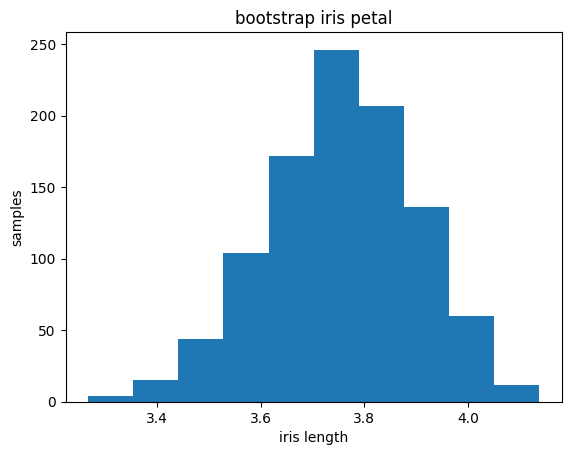

In [46]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
plt.hist(boot_se_samples, label='Data')

# Add a title
plt.title('bootstrap iris petal')

# Add a label to the x-axis
plt.xlabel('iris length')

# Add a label to the y-axis
plt.ylabel('samples')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 